## EM works

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\model_results.csv')

# Print column names
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


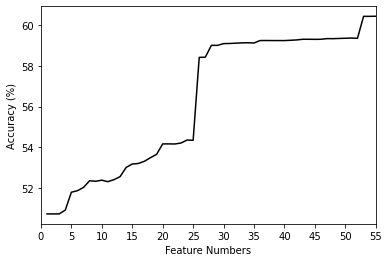

In [4]:
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\model_results.csv')

df['B'] = pd.to_numeric(df['B'], errors='coerce')
df['D'] = pd.to_numeric(df['D'], errors='coerce') * 100

x = df['B'].to_numpy()
y = df['D'].to_numpy()

# Plotting
plt.plot(x,y, color='black')  # Use plt.plot() for a line plot
plt.xlabel('Feature Numbers')
plt.ylabel('Accuracy (%)')
# plt.title('Line Plot of Column B vs Column D')
plt.xlim(0, 55)
plt.xticks(range(0, 56, 5))

# plt.ylim(40, 70)
# plt.yticks(range(40, 70, 5))

plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\EM_Works.png', dpi=300)
plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\EM_Works.svg')

plt.show()

## Creating Combined ROC

In [5]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_LogisticRegression_best.csv')
df2 = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_LightGBM_best.csv')
df3 = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_RandomForest_best.csv')
df4 = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_NN_best.csv')  # Load df4

# Merging df1 and df2
merged_df = pd.merge(df1, df2, on='False Positive Rate', suffixes=('_loggistic', '_LightGBM'))

# Merging the result with df3
merged_df = pd.merge(merged_df, df3, on='False Positive Rate')

# Renaming the columns from df3 to include the suffix "_RandomForest"
new_column_names = {col: col + '_RandomForest' for col in df3.columns if col != 'False Positive Rate'}
merged_df.rename(columns=new_column_names, inplace=True)

# Merging the result with df4
merged_df = pd.merge(merged_df, df4, on='False Positive Rate')

# Renaming the columns from df4 to include the suffix "_NN"
new_column_names = {col: col + '_NN' for col in df4.columns if col != 'False Positive Rate'}
merged_df.rename(columns=new_column_names, inplace=True)

# Saving the merged DataFrame
merged_df.to_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_final.csv', index=False)

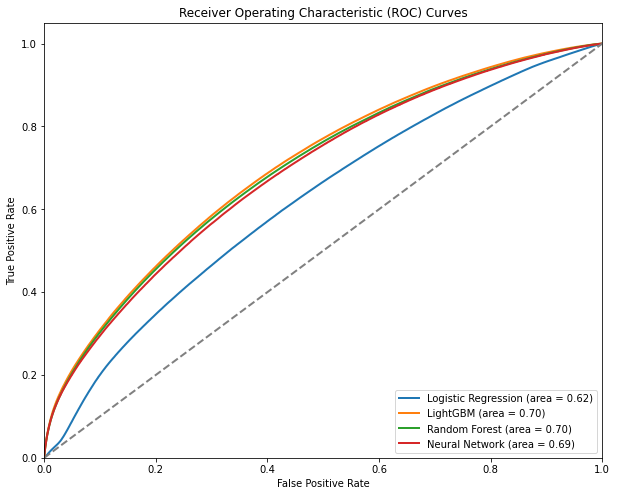

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (area = {roc_auc:.2f})')

# Initialize plot
plt.figure(figsize=(10, 8))

# Load and plot ROC data for Logistic Regression
roc_data_lr = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_LogisticRegression_best.csv')
fpr_lr = roc_data_lr['False Positive Rate'].to_numpy()
tpr_lr = roc_data_lr['True Positive Rate'].to_numpy()
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')

# Load and plot ROC data for LightGBM
roc_data_lgbm = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_LightGBM_best.csv')
fpr_lgbm = roc_data_lgbm['False Positive Rate'].to_numpy()
tpr_lgbm = roc_data_lgbm['True Positive Rate'].to_numpy()
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
plot_roc_curve(fpr_lgbm, tpr_lgbm, roc_auc_lgbm, 'LightGBM')

# Load and plot ROC data for Random Forest
roc_data_rf = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_RandomForest_best.csv')
fpr_rf = roc_data_rf['False Positive Rate'].to_numpy()
tpr_rf = roc_data_rf['True Positive Rate'].to_numpy()
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

# Load and plot ROC data for Neural Network
roc_data_nn = pd.read_csv('C:\\Users\\rp7248\\Desktop\\Csv files\\roc_data_NN_best.csv')
fpr_nn = roc_data_nn['False Positive Rate'].to_numpy()
tpr_nn = roc_data_nn['True Positive Rate'].to_numpy()
roc_auc_nn = auc(fpr_nn, tpr_nn)
plot_roc_curve(fpr_nn, tpr_nn, roc_auc_nn, 'Neural Network')

# Add reference line and labels
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\Roc.png', dpi=2400)
plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\Roc.svg')

# Show plot
plt.show()


## Bar diagram

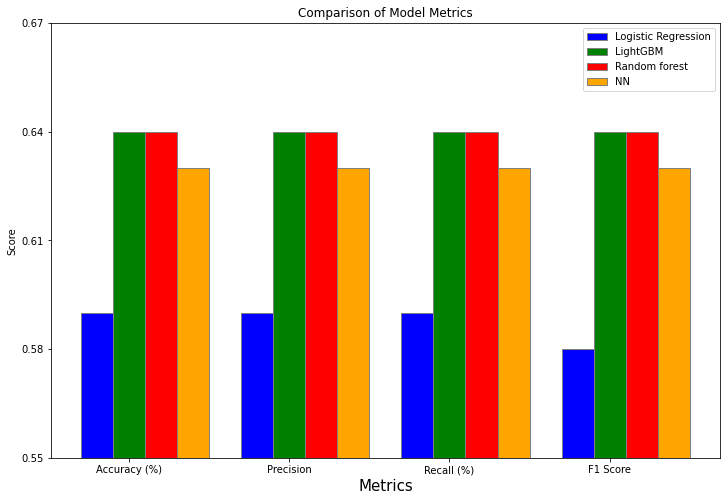

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Replace these values with your actual data
metrics = ['Accuracy (%)', 'Precision', 'Recall (%)', 'F1 Score']
model1 = [0.59, 0.59, 0.59, 0.58]  # logistic_regression
model2 = [0.64, 0.64, 0.64, 0.64]  # LightGBM
model3 = [0.64, 0.64, 0.64, 0.64]  # Random forest
model4 = [0.63, 0.63, 0.63, 0.63]  # NN

# The x position of bars
barWidth = 0.2
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the bars for each model
plt.figure(figsize=(12, 8))
plt.bar(r1, model1, color='b', width=barWidth, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, model2, color='g', width=barWidth, edgecolor='grey', label='LightGBM')
plt.bar(r3, model3, color='r', width=barWidth, edgecolor='grey', label='Random forest')
plt.bar(r4, model4, color='orange', width=barWidth, edgecolor='grey', label='NN')

# Add titles and labels
plt.xlabel('Metrics', fontsize=15)
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')

plt.ylim(0.55, 0.67)
plt.yticks(np.arange(0.55, 0.68, 0.03))

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(metrics))], metrics)

# Create legend & Show graphic
plt.legend()

plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\Bar_diagram.png', dpi=300)
plt.savefig('C:\\Users\\rp7248\\Desktop\\Image\\Bar_diagram.svg')
plt.show()
